In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATADIR = '../build/output/'
file = "TES_nt_hits_t5.csv"
file_path = DATADIR + file


In [3]:
df = pd.read_csv(file_path, header=None, comment="#", on_bad_lines="skip")

df.columns = [
    "event_id", "track_id", "particle", "parent_id",
    "time", "volume", "copy_no", "energy",
    "prev_volume", "step_no", "process"
]
df.head()

,event_id,track_id,particle,parent_id,time,volume,copy_no,energy,prev_volume,step_no,process
0,0,101,opticalphoton,0,9.62556,sipm_PV,20,0.004139,scintillator2,1,Cerenkov
1,0,101,opticalphoton,0,9.64031,sipm_PV,20,0.004139,scintillator2,1,Cerenkov
2,0,101,opticalphoton,0,9.65551,sipm_PV,20,0.004139,scintillator2,1,Cerenkov
3,0,92,opticalphoton,0,32.27320,sipm_PV,28,0.003781,scintillator2,1,Cerenkov
4,0,92,opticalphoton,0,32.28670,sipm_PV,28,0.003781,scintillator2,1,Cerenkov


In [4]:
sipm_counts = df.groupby("copy_no").size().reset_index(name="photon_count")

total_photons = sipm_counts["photon_count"].sum()

print(sipm_counts)
print(f"\nTotal detected photons: {total_photons}")


    copy_no  photon_count
0        16             8
1        17            20
2        18            20
3        19            29
4        20            17
5        21             5
6        22            35
7        23            14
8        24            32
9        25            33
10       26            37
11       27            17
12       28            22
13       29            21
14       30            27
15       31            28

Total detected photons: 365


In [5]:
photon_dist = np.zeros((16, 16))

In [6]:
for i in sipm_counts.to_numpy():
    # scintillator 1
    if i[0] < 8 and i[0]:
        for j in photon_dist:
            j[i[0]] += i[1]
    elif i[0] >= 8 and i[0] < 16:
        photon_dist[i[0]-8] += i[1]
    # scintillator 2 
    elif i[0] >= 16 and i[0] < 24:
        for j in photon_dist:
            j[i[0]-8] += i[1]
    elif i[0] >= 24 and i[0] < 32:
        photon_dist[i[0]-24] += i[1]
    # scintillator 3 
    elif i[0] >= 32 and i[0] < 40:
        photon_dist[i[0]-24] += i[1]
    elif i[0] >= 40 and i[0] < 48:
        for j in photon_dist:
            j[i[0] - 32] += i[1]
    # scintillator 4
    elif i[0] >= 48 and i[0] < 56:
        photon_dist[i[0]-40] += i[1]
    elif i[0] >= 56 and i[0] < 64:
        for j in photon_dist:
            j[i[0] - 56] += i[1]

(np.float64(-0.5), np.float64(15.5), np.float64(15.5), np.float64(-0.5))

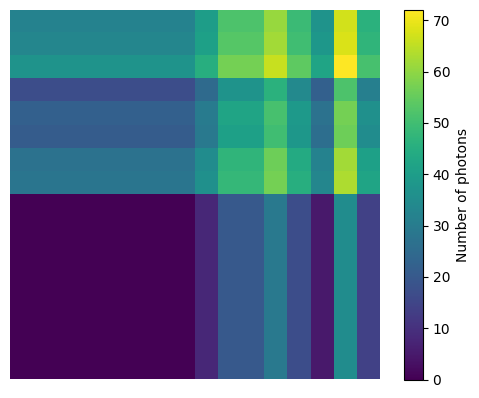

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(photon_dist)
plt.colorbar(im, ax=ax, label='Number of photons')
plt.axis('off')